In [122]:
library(dplyr)
library(ggplot2)

In [123]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D11/"
mysuffix = "pool1_13_noddd_D11.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.celltype_counts.tsv"

myfilename = paste0(mydir,mysuffix)
df0 = read.table(myfilename, header = T)
df0$treatment = 'NONE'
head(df0)

donor_id,pool_id,time_point,celltype,n_cells,treatment
HPSI0114i-eipl_1,pool1,D11,FPP,1672,NONE
HPSI0114i-eipl_1,pool1,D11,NB,228,NONE
HPSI0114i-eipl_1,pool1,D11,P_FPP,1217,NONE
HPSI0114i-kolf_2,pool12,D11,FPP,334,NONE
HPSI0114i-kolf_2,pool12,D11,NB,16,NONE
HPSI0114i-kolf_2,pool12,D11,P_FPP,190,NONE


In [124]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/"
mysuffix = "pool1_13_noddd_D30.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.celltype_counts.tsv"

myfilename = paste0(mydir,mysuffix)
df1= read.table(myfilename, header = T)
df1$celltype <- as.character(df1$celltype)
df1$celltype[df1$celltype == "Astro"] <- "FPP"
df1$celltype[df1$celltype == "CHem"] <- "U_Neur1"
df1$celltype[df1$celltype == "unknown"] <- "U_Neur2"
df1$treatment = 'NONE'
head(df1)

donor_id,pool_id,time_point,celltype,n_cells,treatment
HPSI0114i-bezi_3,pool10,D30,FPP,62,NONE
HPSI0114i-bezi_3,pool10,D30,U_Neur1,11,NONE
HPSI0114i-bezi_3,pool10,D30,DA,115,NONE
HPSI0114i-bezi_3,pool10,D30,Epen1,21,NONE
HPSI0114i-bezi_3,pool10,D30,P_FPP,13,NONE
HPSI0114i-bezi_3,pool10,D30,Sert,66,NONE


In [125]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
mysuffix = "pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point-treatment.celltype_counts.tsv"

myfilename = paste0(mydir,mysuffix)
df2 = read.table(myfilename, header = T)
df2$celltype <- as.character(df2$celltype)
df2$celltype[df2$celltype == "CHem"] <- "U_Neur1"
df2$celltype[df2$celltype == "unknown"] <- "U_Neur3"
head(df2)

donor_id,pool_id,time_point,treatment,celltype,n_cells
HPSI0114i-bezi_3,pool10,D52,NONE,Astro,2
HPSI0114i-bezi_3,pool10,D52,NONE,U_Neur1,5
HPSI0114i-bezi_3,pool10,D52,NONE,DA,66
HPSI0114i-bezi_3,pool10,D52,NONE,Epen1,39
HPSI0114i-bezi_3,pool10,D52,NONE,FPP,31
HPSI0114i-bezi_3,pool10,D52,NONE,P_FPP,4


In [126]:
df = rbind(df0,df1,df2)
head(df)

donor_id,pool_id,time_point,celltype,n_cells,treatment
HPSI0114i-eipl_1,pool1,D11,FPP,1672,NONE
HPSI0114i-eipl_1,pool1,D11,NB,228,NONE
HPSI0114i-eipl_1,pool1,D11,P_FPP,1217,NONE
HPSI0114i-kolf_2,pool12,D11,FPP,334,NONE
HPSI0114i-kolf_2,pool12,D11,NB,16,NONE
HPSI0114i-kolf_2,pool12,D11,P_FPP,190,NONE


In [127]:
supp_tables_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/neuroseq_ms/supp_tables/"
filename = paste0(supp_tables_dir,"SuppTable2_ncells_per_donor_pool_celltype_condition.csv")
write.csv(df,filename, quote = F, row.names = F)

In [134]:
df[df$time_point == 'D52' & df$treatment == 'ROT',] %>% group_by(pool_id) %>% summarize(total_cells = sum(n_cells))

pool_id,total_cells
pool1,25722
pool11,10866
pool13,4230
pool2,16864
pool3,16103
pool4,31642
pool5,23162
pool6,17904
pool7,18848
pool8,19809


In [45]:
df_tot = df %>% group_by(donor_id) %>% summarize(total_cells = sum(n_cells))

df_tot = df_tot[order(df_tot$total_cells, decreasing = T),]
head(df_tot)

donor_id,total_cells
HPSI0514i-fiaj_1,59973
HPSI0414i-mita_1,43603
HPSI0114i-eipl_1,31643
HPSI1014i-eesb_1,29840
HPSI0115i-paim_1,29425
HPSI0215i-zett_5,27406


In [46]:
nrow(df_tot)
sum(df_tot$total_cells)/2
x = 25
sum(df_tot$total_cells[1:x])
x/nrow(df_tot)

[1] 215

[1] 513699

[1] 518931

[1] 0.1162791

In [101]:
df_D11 = df[df$time_point == 'D11',] %>% group_by(donor_id) %>% summarize(total_cells = sum(n_cells))
df_D11 = df_D11[order(df_D11$total_cells, decreasing = T),]
head(df_D11,2)

donor_id,total_cells
HPSI0414i-mita_1,14640
HPSI0514i-fiaj_1,10446


In [106]:
nrow(df_D11)
sum(df_D11$total_cells)/2
x = 31
sum(df_D11$total_cells[1:x])
x/nrow(df_D11)

[1] 177

[1] 126690.5

[1] 128824

[1] 0.1751412

In [107]:
df_D30 = df[df$time_point == 'D30',] %>% group_by(donor_id) %>% summarize(total_cells = sum(n_cells))
df_D30 = df_D30[order(df_D30$total_cells, decreasing = T),]
head(df_D30,2)

donor_id,total_cells
HPSI0514i-fiaj_1,13299
HPSI0414i-mita_1,13112


In [113]:
nrow(df_D30)
sum(df_D30$total_cells)/2
x = 22
sum(df_D30$total_cells[1:x])
x/nrow(df_D30)

[1] 175

[1] 125461.5

[1] 127127

[1] 0.1257143

In [114]:
df_D52 = df[df$time_point == 'D52',] %>% group_by(donor_id) %>% summarize(total_cells = sum(n_cells))
df_D52 = df_D52[order(df_D52$total_cells, decreasing = T),]
head(df_D52,2)

donor_id,total_cells
HPSI0514i-fiaj_1,36228
HPSI0114i-eipl_1,25935


In [121]:
nrow(df_D52)
sum(df_D52$total_cells)/2
x = 18
sum(df_D52$total_cells[1:x])
x/nrow(df_D52)

[1] 199

[1] 261547

[1] 262253

[1] 0.09045226

In [84]:
df0 = df %>% group_by(donor_id, pool_id) %>% summarize(total_cells = sum(n_cells))
pools = unique(df0$pool_id)
# length(pools)
df1 = data.frame()
for (pool in pools){
    df_pool = df0[df0$pool_id == pool,]
    df_pool = df_pool[order(df_pool$total_cells, decreasing = T),]
    lines_in_pool = nrow(df_pool)
    tot_cells = sum(df_pool$total_cells)
    cells_top_line = df_pool$total_cells[1]
    df1 = rbind(df1, data.frame(pool = pool, tot_cells = tot_cells, 
                                nlines = lines_in_pool, top_cell_line = df_pool$donor_id[1],
                                fraction_cells_top_line = cells_top_line/tot_cells))
#     print(c(pool,tot_cells,cells_top_line/tot_cells))
}

In [85]:
df1

pool,tot_cells,nlines,top_cell_line,fraction_cells_top_line
pool1,85152,7,HPSI0114i-eipl_1,0.3716061
pool12,25547,20,HPSI0713i-wiol_1,0.1162563
pool10,31821,15,HPSI0115i-timk_4,0.5545080
pool15,17872,9,HPSI0613i-oomz_22,0.2437332
pool6,131505,24,HPSI0414i-mita_1,0.3315691
pool7,88341,22,HPSI1014i-roug_3,0.2197621
pool4,106152,18,HPSI1014i-eesb_1,0.2811063
pool8,114990,19,HPSI0215i-zett_5,0.1514740
pool2,76431,9,HPSI0614i-uevq_6,0.2651019
pool3,60959,9,HPSI1014i-quls_2,0.3023015


[1] -0.3493505

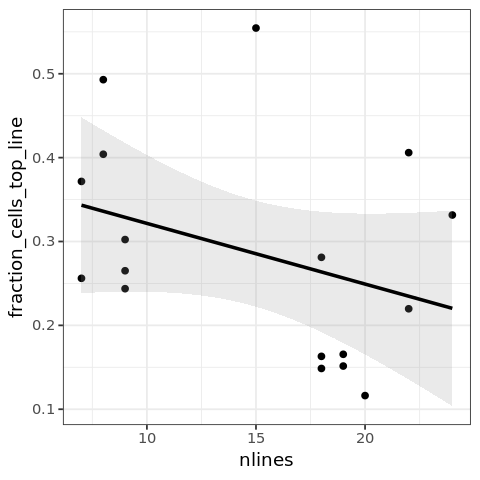

In [86]:
cor(df1$nlines, df1$fraction_cells_top_line)
options(repr.plot.width=4, repr.plot.height=4)
ggplot(df1, aes(x = nlines, y = fraction_cells_top_line)) + geom_point() + 
    stat_smooth(method = "lm", alpha = 0.2, col = "black") + theme_bw()

In [98]:
df0 = df %>% group_by(donor_id, pool_id) %>% summarize(total_cells = sum(n_cells))
pools = unique(df0$pool_id)
# length(pools)
df1 = data.frame()
for (pool in pools){
    df_pool = df0[df0$pool_id == pool,]
    df_pool = df_pool[order(df_pool$total_cells, decreasing = T),]
    n_lines = nrow(df_pool)
    tot_cells = sum(df_pool$total_cells)
    dist = tot_cells
    n_top_lines = 1
    for (i in 1:n_lines){
        n = sum(df_pool$total_cells[1:i])
        if (abs(n-tot_cells/2)<dist){
            dist = abs(n-tot_cells/2)
            n_top_lines = i}
    }
#     print(n_top_lines/n_lines)
    cells_top_line = df_pool$total_cells[1]
    df1 = rbind(df1, data.frame(pool = pool, tot_cells = tot_cells, 
                                nlines = n_lines, 
                                fraction_lines_making_50pct_cells = n_top_lines/n_lines))
}

In [99]:
df1

pool,tot_cells,nlines,fraction_lines_making_50pct_cells
pool1,85152,7,0.14285714
pool12,25547,20,0.25000000
pool10,31821,15,0.06666667
pool15,17872,9,0.22222222
pool6,131505,24,0.12500000
pool7,88341,22,0.18181818
pool4,106152,18,0.11111111
pool8,114990,19,0.26315789
pool2,76431,9,0.22222222
pool3,60959,9,0.22222222


[1] -0.1304154

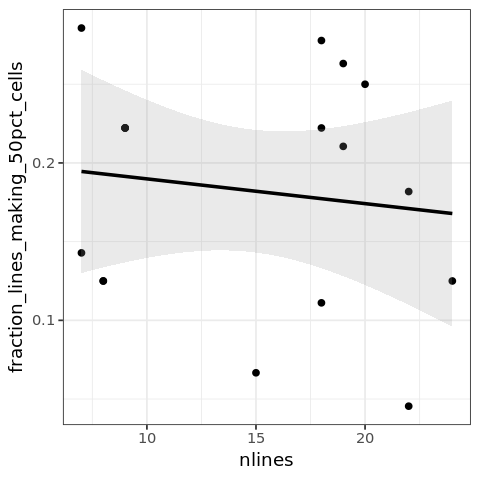

In [100]:
cor(df1$nlines, df1$fraction_lines_making_50pct_cells)
options(repr.plot.width=4, repr.plot.height=4)
ggplot(df1, aes(x = nlines, y = fraction_lines_making_50pct_cells)) + geom_point() + 
    stat_smooth(method = "lm", alpha = 0.2, col = "black") + theme_bw()